In [207]:
import plotly.express as px
import plotly.graph_objects as go
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [208]:
url = "https://www.cer-rec.gc.ca/en/data-analysis/canada-energy-future/2023/figures.xlsx"
df = pd.read_excel(url, sheet_name='R.26', header=5)

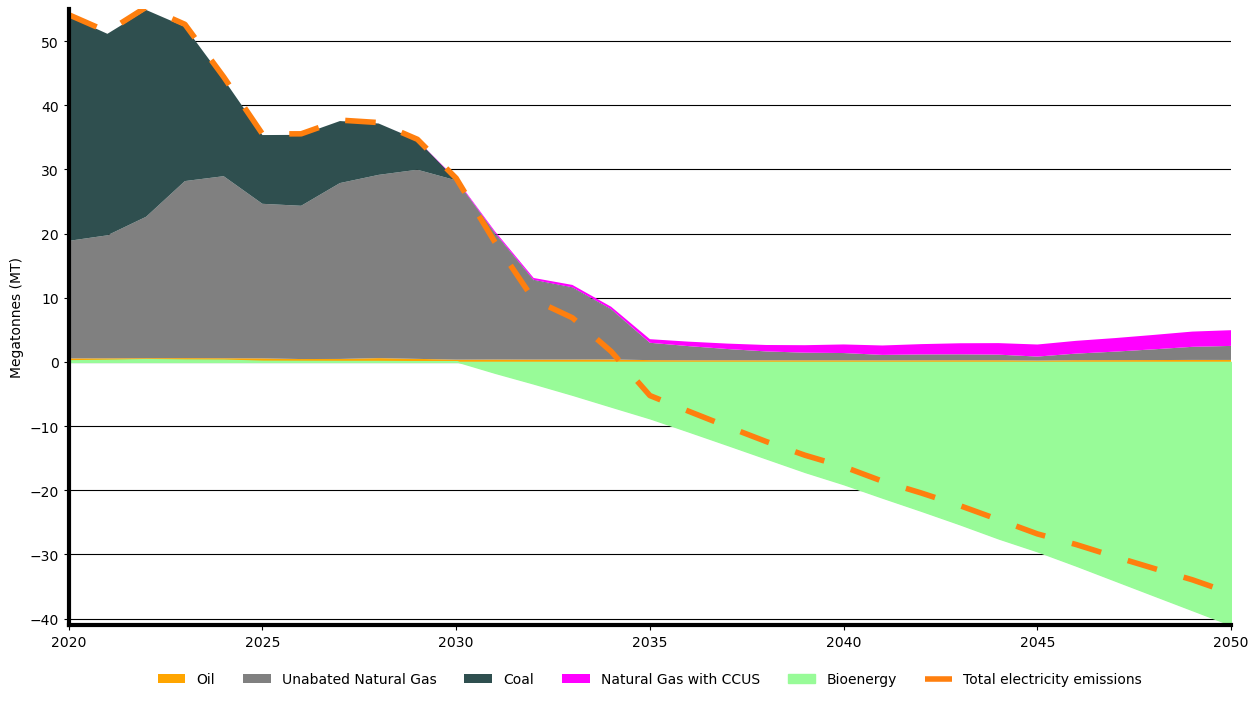

In [209]:
coal = df[df['Fuel'] == 'Coal']
bioenergy = df[df['Fuel'] == 'Bioenergy']
oil = df[df['Fuel'] == 'Oil']
gas_ccus = df[df['Fuel'] == 'Natural Gas with CCUS']
gas = df[df['Fuel'] == 'Unabated Natural Gas']
total = df.groupby(['Year']).sum().reset_index()

fig, ax = plt.subplots(figsize=(15,8))

ax.stackplot(coal['Year'], oil['Data'], gas['Data'], coal['Data'], gas_ccus['Data'], colors=('orange','grey','darkslategrey','fuchsia'), zorder=3, 
    labels=('Oil','Unabated Natural Gas','Coal', 'Natural Gas with CCUS'))
ax.stackplot(bioenergy['Year'], bioenergy['Data'], color='palegreen', zorder=3, labels=('Bioenergy',None))
ax.plot(total['Year'], total['Data'], linestyle='--', dashes=(5.5,5), linewidth=4, zorder=3, label='Total electricity emissions')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_linewidth(3)
ax.spines['left'].set_linewidth(3)
ax.spines['bottom'].set_zorder(4)
ax.spines['left'].set_zorder(4)

ax.grid(color='black', axis='y', zorder=0)
plt.xlim(2020,2050)
plt.ylim(-41,55)
plt.yticks(np.arange(-40,60,step=10))
plt.ylabel('Megatonnes (MT)')
plt.legend(loc=8, bbox_to_anchor=(0.5, -.12), ncol=6, frameon=False)

plt.show()

In [210]:
df = pd.read_excel(url, sheet_name='R.27', header=5)

In [211]:
df

,Year,Data,Scenario,Unit
0,2005,2.612390,Current Measures,MMb/d
1,2006,2.786880,Current Measures,MMb/d
2,2007,2.886280,Current Measures,MMb/d
3,2008,2.818720,Current Measures,MMb/d
4,2009,2.855060,Current Measures,MMb/d
...,...,...,...,...
133,2046,1.804377,Global Net-zero,MMb/d
134,2047,1.695335,Global Net-zero,MMb/d
135,2048,1.561151,Global Net-zero,MMb/d
136,2049,1.437511,Global Net-zero,MMb/d


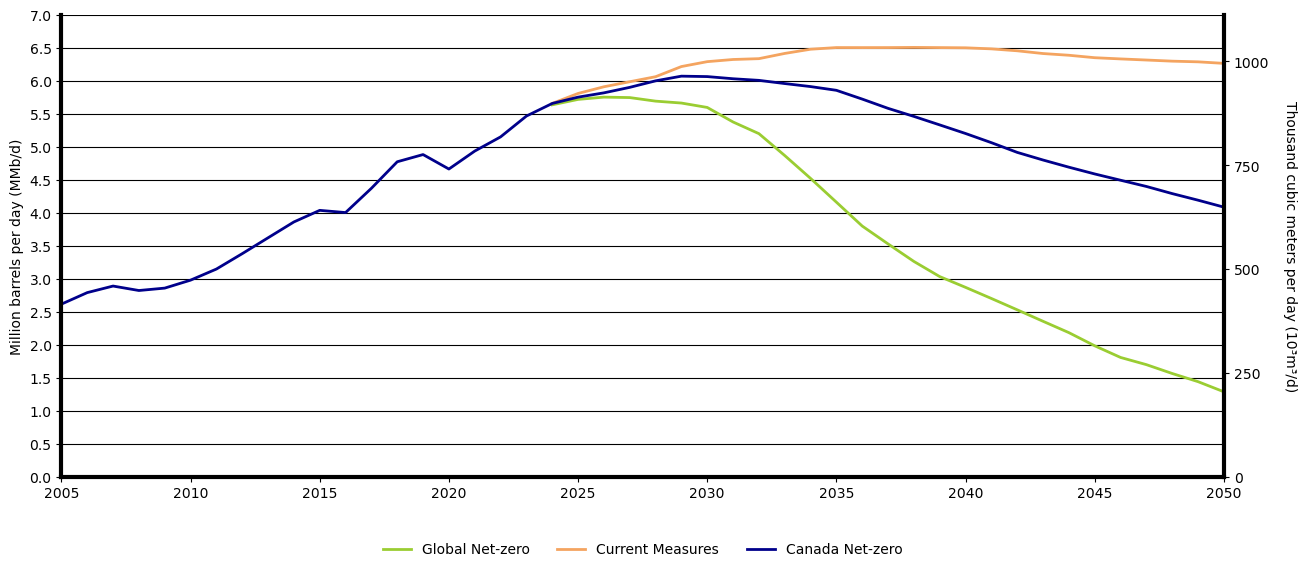

In [212]:
cm = df[(df['Scenario'] == 'Current Measures') & (df['Year'] >= 2024)]
cnz = df[(df['Scenario'] == 'Canada Net-zero')]
gnz = df[(df['Scenario'] == 'Global Net-zero') & (df['Year'] >= 2024)]

fig, ax = plt.subplots(figsize=(15,6))

ax.plot(gnz['Year'], gnz['Data'], color='yellowgreen', linewidth=2, label='Global Net-zero')
ax.plot(cm['Year'], cm['Data'], color='sandybrown', linewidth=2, label='Current Measures')
ax.plot(cnz['Year'], cnz['Data'], color='darkblue', linewidth=2, label='Canada Net-zero')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_linewidth(3)
ax.spines['bottom'].set_linewidth(3)
ax.spines['left'].set_linewidth(3)
ax.spines['bottom'].set_zorder(4)
ax.spines['left'].set_zorder(4)

ax.grid(color='black', axis='y', zorder=0)
plt.xlim(2005,2050)
plt.yticks(np.arange(0,8,step=0.5))
plt.ylim(0,7)
plt.ylabel('Million barrels per day (MMb/d)')
plt.legend(loc=8, bbox_to_anchor=(0.5, -.2), ncol=6, frameon=False)

def bbl2metric(x):
    return x * 158.987

def metric2bbl(x):
    return x * (1/158.987)

secax = ax.secondary_yaxis('right', functions=(bbl2metric, metric2bbl))
secax.set_ylabel('Thousand cubic meters per day (10\u00b3m\u00b3/d)', rotation=270, labelpad=20)
secax.set_yticks(np.arange(0,1001,step=250))

plt.show()

In [213]:
df = pd.read_excel(url, sheet_name='R.7', header=5)

In [214]:
df

,Year,Scenario,Fuel,Data,Unit
0,2030,Current Measures,BioFuels & Emerging Energy,157.9331,Petajoules (PJ)
1,2030,Current Measures,Electricity,1376.8360,Petajoules (PJ)
2,2030,Current Measures,Hydrogen,0.0591,Petajoules (PJ)
3,2030,Current Measures,Natural Gas,1259.4801,Petajoules (PJ)
4,2030,Current Measures,Other,0.0000,Petajoules (PJ)
5,2030,Current Measures,RPP,235.2040,Petajoules (PJ)
6,2030,Global Net-zero,BioFuels & Emerging Energy,151.7193,Petajoules (PJ)
7,2030,Global Net-zero,Electricity,1384.9663,Petajoules (PJ)
8,2030,Global Net-zero,Hydrogen,0.0042,Petajoules (PJ)
9,2030,Global Net-zero,Natural Gas,1160.3056,Petajoules (PJ)


In [215]:
df

,Year,Scenario,Fuel,Data,Unit
0,2030,Current Measures,BioFuels & Emerging Energy,157.9331,Petajoules (PJ)
1,2030,Current Measures,Electricity,1376.8360,Petajoules (PJ)
2,2030,Current Measures,Hydrogen,0.0591,Petajoules (PJ)
3,2030,Current Measures,Natural Gas,1259.4801,Petajoules (PJ)
4,2030,Current Measures,Other,0.0000,Petajoules (PJ)
5,2030,Current Measures,RPP,235.2040,Petajoules (PJ)
6,2030,Global Net-zero,BioFuels & Emerging Energy,151.7193,Petajoules (PJ)
7,2030,Global Net-zero,Electricity,1384.9663,Petajoules (PJ)
8,2030,Global Net-zero,Hydrogen,0.0042,Petajoules (PJ)
9,2030,Global Net-zero,Natural Gas,1160.3056,Petajoules (PJ)


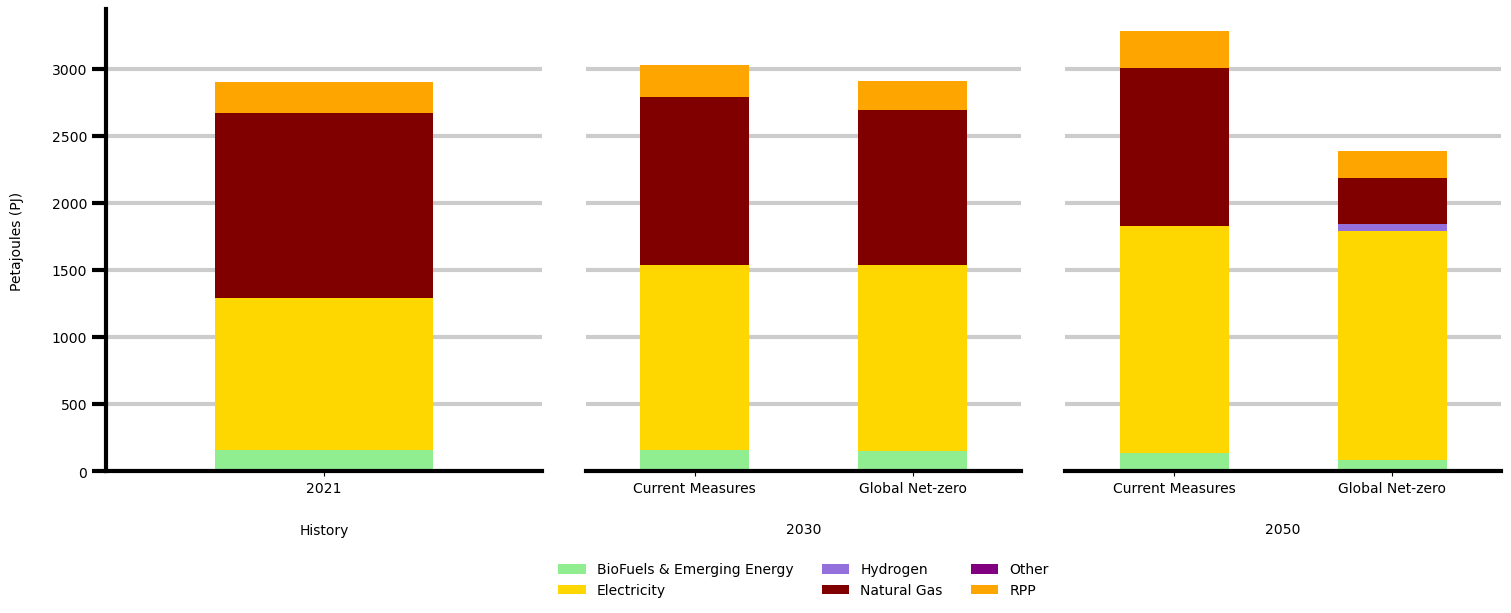

In [255]:
pivot_fifty = fifty.pivot_table(index='Scenario', columns='Fuel', values='Data', aggfunc='sum')
pivot_thirty = thirty.pivot_table(index='Scenario', columns='Fuel', values='Data', aggfunc='sum')
pivot_hist = hist.pivot_table(index='Scenario', columns='Fuel', values='Data', aggfunc='sum')

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 6), sharey=True)
color_map = {
    'BioFuels & Emerging Energy': 'lightgreen',
    'Electricity': 'gold',
    'Hydrogen': 'mediumpurple',
    'Natural Gas': 'maroon',
    'Other':'purple',
    'RPP':'orange'
}

# Plot each pivot table on its respective subplot
pivot_hist.plot(kind='bar', stacked=True, ax=axes[0], legend=False, zorder=3, color=[color_map[col] for col in pivot_hist.columns])
axes[0].set_xlabel('History', labelpad=20)
axes[0].set_ylabel('Petajoules (PJ)', labelpad=20)
axes[0].tick_params(axis='x', labelrotation=0)
axes[0].spines['top'].set_visible(False)
axes[0].spines['right'].set_visible(False)
axes[0].spines['bottom'].set_linewidth(3)
axes[0].spines['left'].set_linewidth(3)
axes[0].spines['bottom'].set_zorder(4)
axes[0].spines['left'].set_zorder(4)
axes[0].grid(color='black', axis='y', zorder=0, linewidth=3, alpha=0.2)
axes[0].tick_params(axis='y', width=3, length=10)

pivot_thirty.plot(kind='bar', stacked=True, ax=axes[1], legend=False, zorder=3, color=[color_map[col] for col in pivot_hist.columns])
axes[1].set_xlabel('2030', labelpad=20)
axes[1].tick_params(axis='x', labelrotation=0)
axes[1].spines['top'].set_visible(False)
axes[1].spines['right'].set_visible(False)
axes[1].spines['left'].set_visible(False)
axes[1].spines['bottom'].set_linewidth(3)
axes[1].spines['left'].set_linewidth(3)
axes[1].spines['bottom'].set_zorder(4)
axes[1].spines['left'].set_zorder(4)
axes[1].grid(color='black', axis='y', zorder=0, linewidth=3, alpha=0.2)
axes[1].tick_params(axis='y', left=False)

pivot_fifty.plot(kind='bar', stacked=True, ax=axes[2], legend=False, zorder=3, color=[color_map[col] for col in pivot_hist.columns])
axes[2].set_xlabel('2050', labelpad=20)
axes[2].tick_params(axis='x', labelrotation=0)
axes[2].spines['top'].set_visible(False)
axes[2].spines['right'].set_visible(False)
axes[2].spines['left'].set_visible(False)
axes[2].spines['bottom'].set_linewidth(3)
axes[2].spines['left'].set_linewidth(3)
axes[2].spines['bottom'].set_zorder(4)
axes[2].spines['left'].set_zorder(4)
axes[2].grid(color='black', axis='y', zorder=0, linewidth=3, alpha=0.2)
axes[2].tick_params(axis='y', left=False, right=False)

# Adjust layout to prevent overlap
plt.legend(loc=8, bbox_to_anchor=(-.6, -.3), ncol=3, frameon=False)
plt.subplots_adjust(wspace=0.1)
plt.show()